In [2]:
pip install roboflow

   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/38.8 MB ? eta -:--:--
    --------------------------------------- 0.8/38.8 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.8/38.8 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.8/38.8 MB 1.2 MB/s eta 0:00:33


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
pip install opencv-python


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [52]:
from roboflow import Roboflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import time
import requests
import json
import base64
import io

import shutil
import torch
import ultralytics
from ultralytics import YOLO



In [73]:
model = YOLO("fire_best.pt")

In [74]:
# 테스트 이미지 경로
test_image = r"C:\Users\common47\kseb_pjt\Test_image.jpg"

# 이미지 로드
image = cv2.imread(test_image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환

# YOLO 모델로 예측
results = model(image)


0: 416x640 1 smoke, 10.8ms
Speed: 3.4ms preprocess, 10.8ms inference, 2.8ms postprocess per image at shape (1, 3, 416, 640)


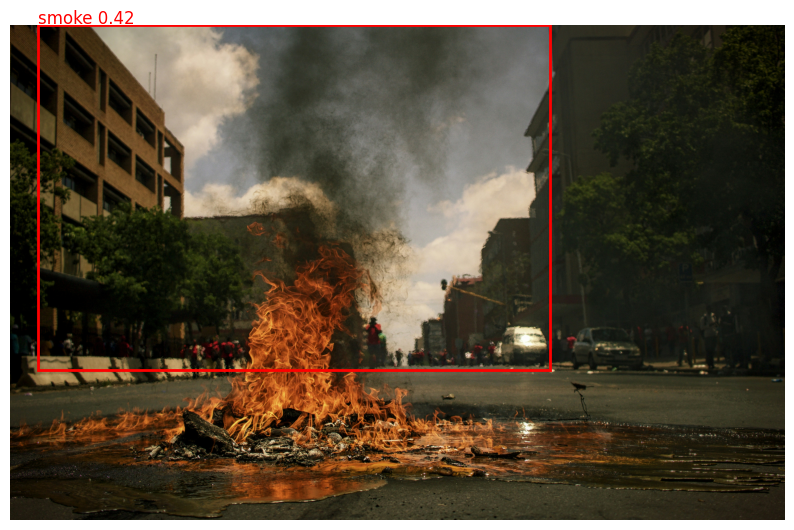

In [75]:
# 결과 시각화
plt.figure(figsize=(10, 10))
for r in results:
    boxes = r.boxes
    for box in boxes:
        # 바운딩 박스 좌표
        x1, y1, x2, y2 = box.xyxy[0]
        x1, y1, x2, y2 = int(x1), int(y1), int(x2), int(y2)
        
        # 신뢰도와 클래스
        conf = float(box.conf[0])
        cls = int(box.cls[0])
        
        # 박스 그리기
        plt.gca().add_patch(plt.Rectangle((x1, y1), x2-x1, y2-y1,
                                        fill=False, color='red', linewidth=2))
        
        # 레이블 추가
        plt.text(x1, y1-10, f'{model.names[cls]} {conf:.2f}',
                color='red', fontsize=12)

plt.imshow(image)
plt.axis('off')
plt.show()